In [39]:
# Import libraries.
using Turing, Zygote, Random, Plots, Distributions, LinearAlgebra, StatsPlots



┌ Info: Precompiling StatsPlots [f3b207a7-027a-5e70-b257-86293d7955fd]
└ @ Base loading.jl:1317
┌ Warning: Module Distributions with build ID 1467132460279324 is missing from the cache.
│ This may mean Distributions [31c24e10-a181-5473-b8eb-7969acd0382f] does not support precompilation but is imported by a module that does.
└ @ Base loading.jl:1008
┌ Info: Skipping precompilation since __precompile__(false). Importing StatsPlots [f3b207a7-027a-5e70-b257-86293d7955fd].
└ @ Base loading.jl:1025


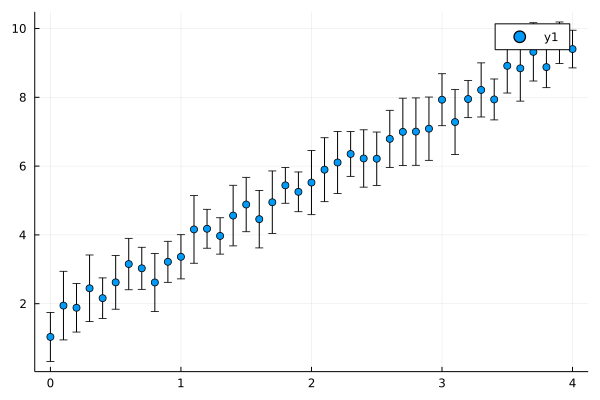

In [87]:
x = range(0, 4, step=0.1)
a = 2.0
b = 1.0

sigma = 0.5*rand(length(x)) .+ 0.5

y = a*x .+ b .+ 1*rand(length(x))

#sigma
scatter(x, y, yerr=sigma)

In [88]:

# Declare our Turing model.
@model function lin_reg(y, sigma)
    # Prior
    a1 ~ Normal(1.5, 1.0)
    b1 ~ Normal(1.5, 2.0)

    # The number of observations.
    N = length(y)
    for i in 1:N
        # Likelihood
        y[i] ~ Normal(a1*x[i] .+ b1, sigma[i])
    end
end

# Settings of the  sampler.
iterations = 10000
ϵ = 0.05
τ = 10

# Start sampling.
chain = sample(lin_reg(y, sigma), NUTS(), iterations)

┌ Info: Found initial step size
│   ϵ = 0.05
└ @ Turing.Inference /Users/hossein/.julia/packages/Turing/Ir2iS/src/inference/hmc.jl:188
Sampling: 100%|█████████████████████████████████████████| Time: 0:00:03


Chains MCMC chain (10000×14×1 Array{Float64, 3}):

Iterations        = 1001:1:11000
Number of chains  = 1
Samples per chain = 10000
Wall duration     = 4.64 seconds
Compute duration  = 4.64 seconds
parameters        = a1, b1
internals         = lp, n_steps, is_accept, acceptance_rate, log_density, hamiltonian_energy, hamiltonian_energy_error, max_hamiltonian_energy_error, tree_depth, numerical_error, step_size, nom_step_size

Summary Statistics
  parameters      mean       std   naive_se      mcse         ess      rhat    ⋯
      Symbol   Float64   Float64    Float64   Float64     Float64   Float64    ⋯

          a1    2.0002    0.0903     0.0009    0.0017   2338.2803    1.0002    ⋯
          b1    1.5425    0.2147     0.0021    0.0042   2324.8535    1.0005    ⋯
                                                                1 column omitted

Quantiles
  parameters      2.5%     25.0%     50.0%     75.0%     97.5% 
      Symbol   Float64   Float64   Float64   Float64   Float64 

     

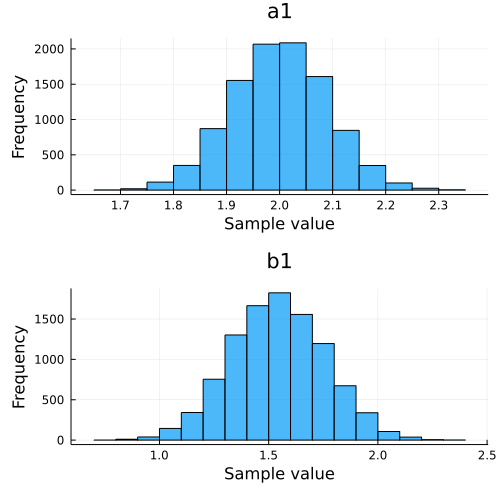

In [89]:
# Plot a summary of the sampling process for the parameter
histogram(chain)

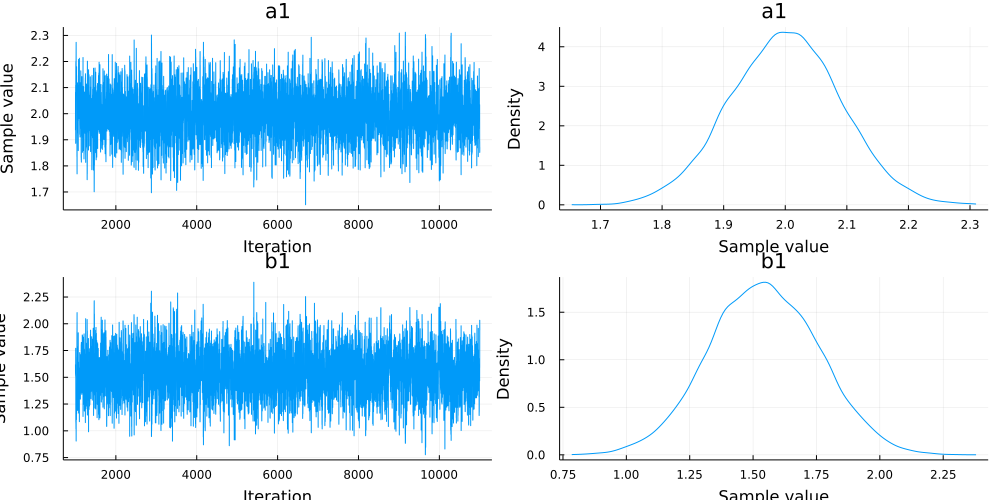

In [90]:
plot(chain)

In [91]:
println(mean(chain[:a1]))
println(mean(chain[:b1]))



2.0002074671681775
1.5425168074800244


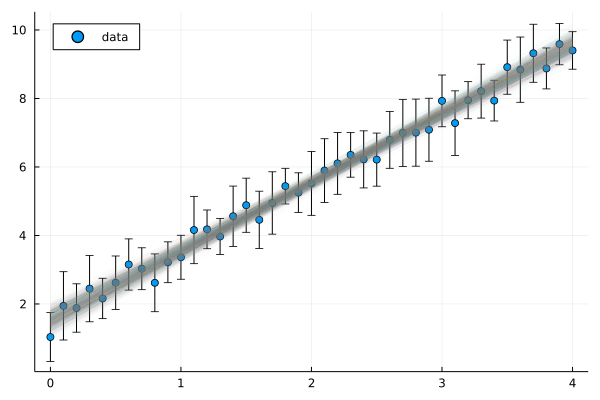

In [101]:
plt = scatter(x, y, yerr=sigma, label="data", legend=:topleft)

for i in length(chain[:a1]):-1:length(chain[:a1])-1000
    #println(chain[:a1][i])
    plot!(plt, x, chain[:a1][i]*x .+ chain[:b1][i] , alpha=0.02, label = "")
end
plt